In [1]:
import os
import sys
import numpy as np
import math
import copy
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
sys.path.insert(0, '..')

In [121]:
from util.plot import get_pd

In [370]:
def get_folder_plots(folder, save=True,crVal=7, root='/home/swei20/SymNormSlidingWindows/'):
    DATADIR = root + folder
    srcFiles = os.listdir(DATADIR)
    for file in srcFiles:
        plt.figure()
        _= get_pd(DATADIR, file,save=save,crVal=crVal) 
    plt.figure()
    tkFiles =  [srcFiles[i]  for i in range(len(srcFiles)) if srcFiles[i][0]=='T']
    _= get_pd(DATADIR, tkFiles[0],tkFiles[1],save=save,crVal=crVal)    
    return None
def get_csv(DATADIR, filename):
    normType, ftr, loop = filename.split('_')[0], filename.split('_')[1], filename.split('_')[2]
    path = os.path.join(DATADIR, filename)   
    out = pd.read_csv(path)
    return out,normType, ftr, loop
def get_pd(DATADIR, filename, FILE2=None, errbar=False, save=True,crVal=7):
    out,normType, ftr, loop = get_csv(DATADIR,filename)
    if FILE2 is not None:
        out2,normType2, ftr2, loop2 = get_csv(DATADIR,FILE2)
        assert ftr == ftr2
        outs = [out,out2]
        normTypes = [normType, normType2]
        plot_topk_norms(ftr, outs, normTypes, crVal=crVal)
        if save: plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}{normType2}.png')
        return outs
    if loop=='mL':
        plot_error(ftr, out, normType, errbar,crVal=crVal)  
    elif loop == 'csL':
        plot_size_error(out, ftr, normType)
    if save: plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}_m.png')
    return out,ftr,normType

def plot_topk_norms(ftr, outs, normTypes, crVal=7):
    for ii, out in enumerate(outs):
        normType = normTypes[ii]
        outR = out[out['cr']== crVal]
        plt.scatter(np.log2(outR['m']), outR['errCs'], label = f'{normType}')
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel(f'Top-k error')
    plt.xlabel('log stream size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')

def plot_error(ftr, out, normType, errbar, crVal = 6,cols=['errUn','errCs']):
    labels=['uniform', f'2^{crVal}-sketch', r'$\mathregular{10^{{crVal}}$']
    outR = out[out['cr']==crVal]
    for i, col in enumerate(cols): 
        plt.scatter(np.log2(outR['m']), outR[col], label = f'{labels[i]}')
    if errbar: plt.errorbar(np.log10(outR['m']), outR['errCs'], outR['std']/2.0, c='r',alpha=0.3)
        
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log stream size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')
def plot_size_error(out, ftr, normType):
    rList = out['r'].unique()
    colors = cm.get_cmap('viridis')(np.linspace(0,1,len(rList)))
    for i, r in enumerate(rList):
        outR = out[out['r']==r]
        plt.scatter(outR['cr'], outR['errCs'], color = colors[i] ,label=f'r={r}')
    plt.legend(frameon=True, facecolor='lightgrey')    
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log sketch size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')

In [123]:
plt.style.use(['ieee','no-latex'])

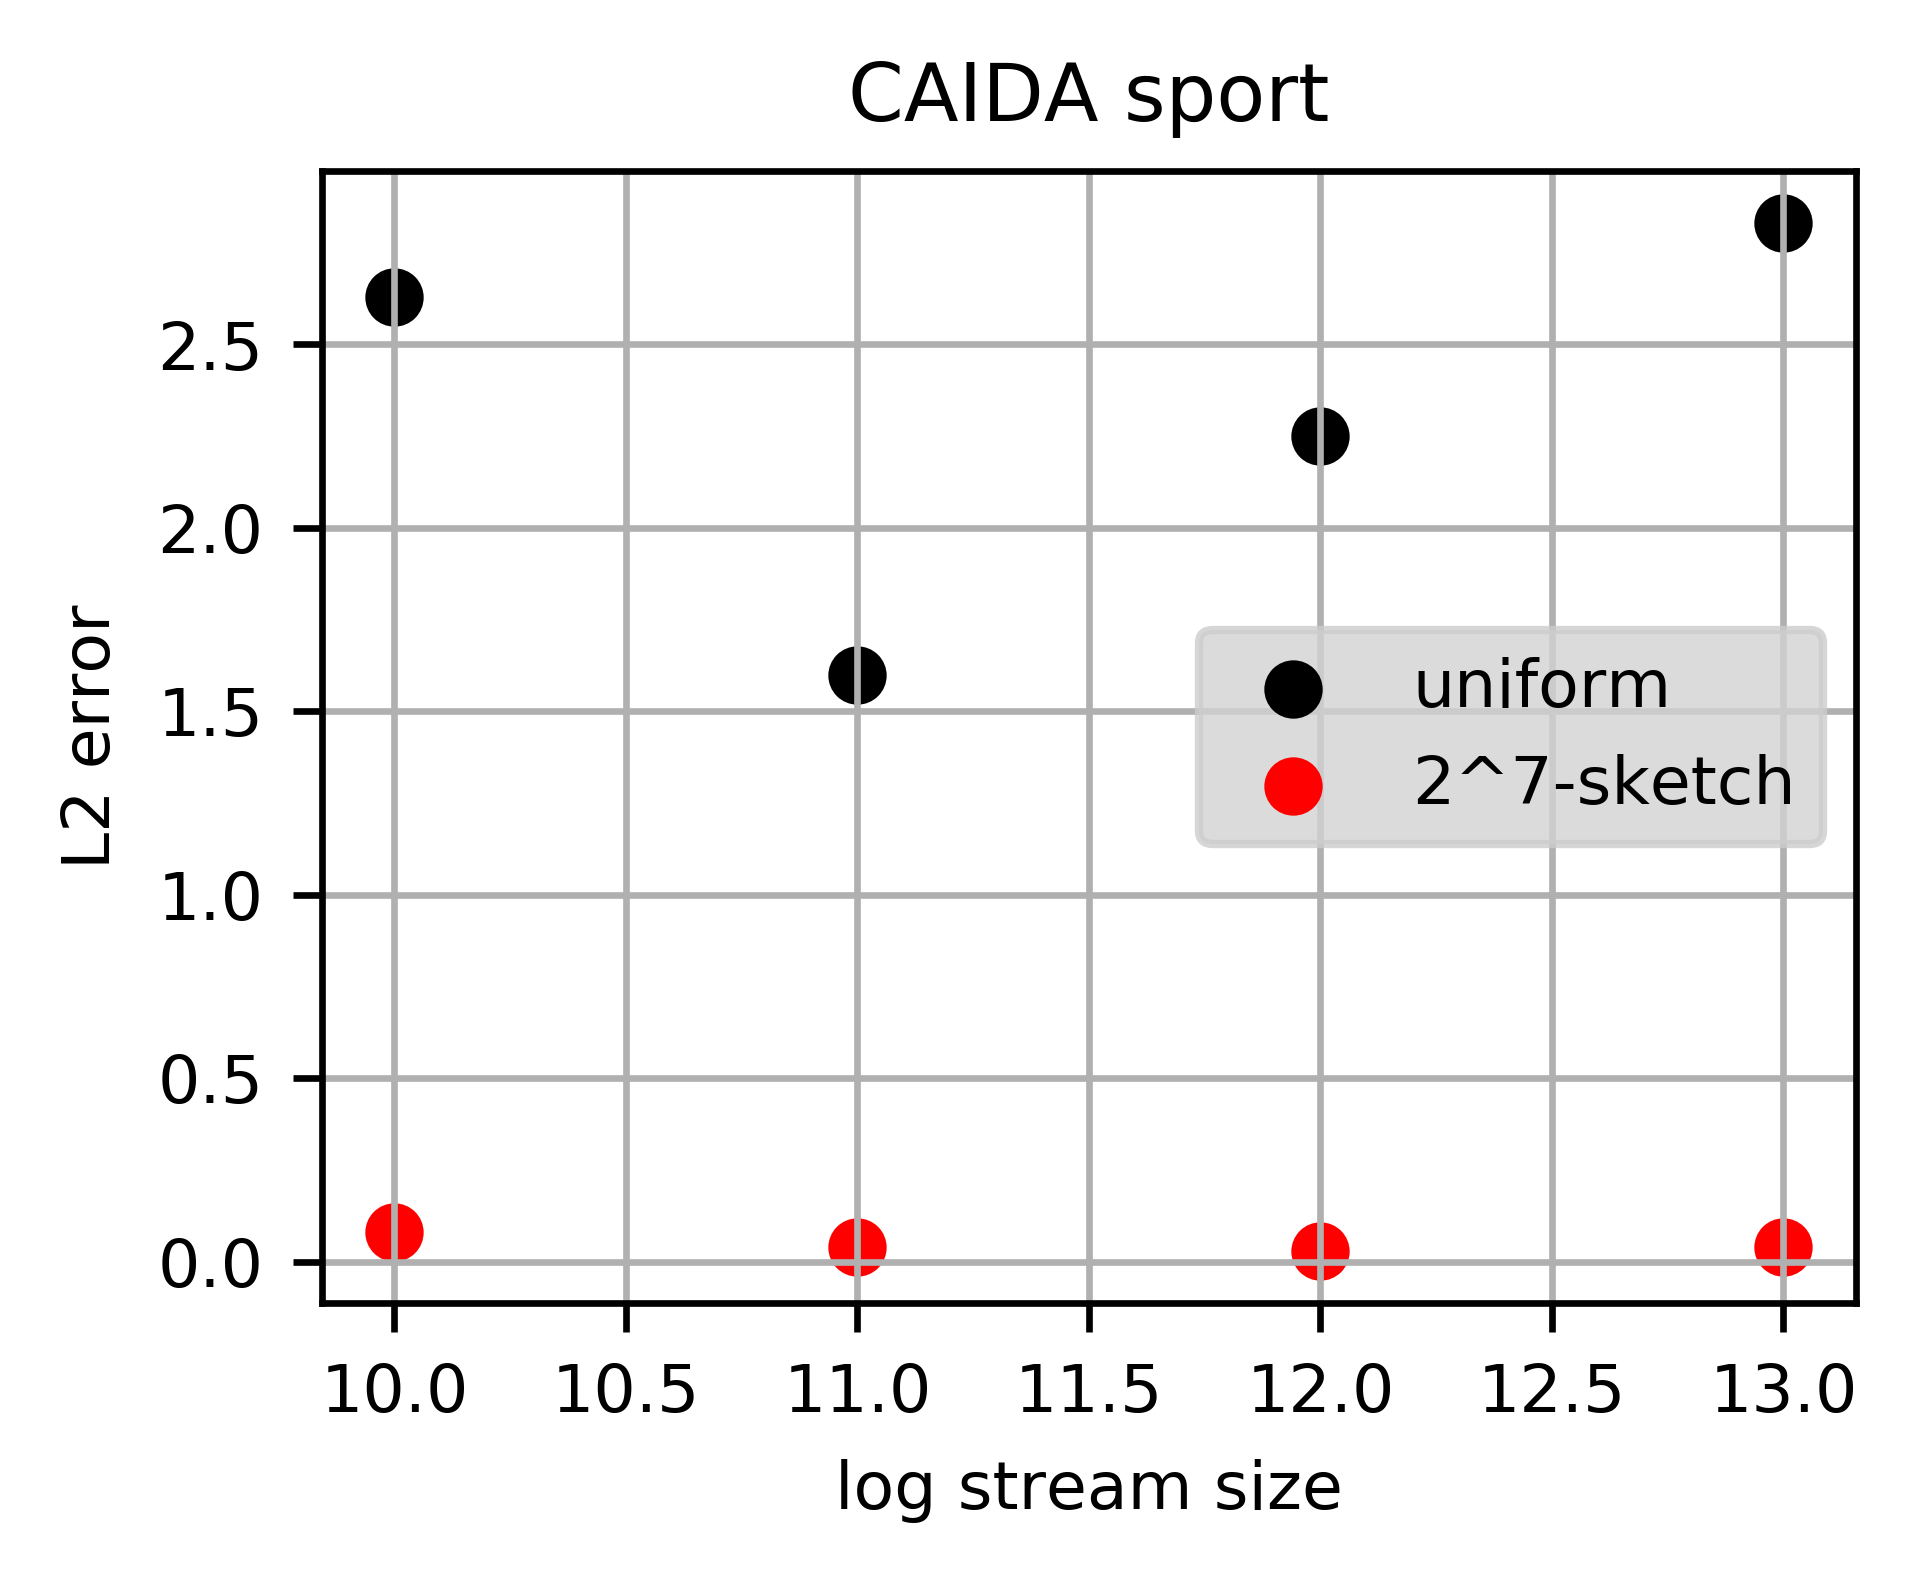

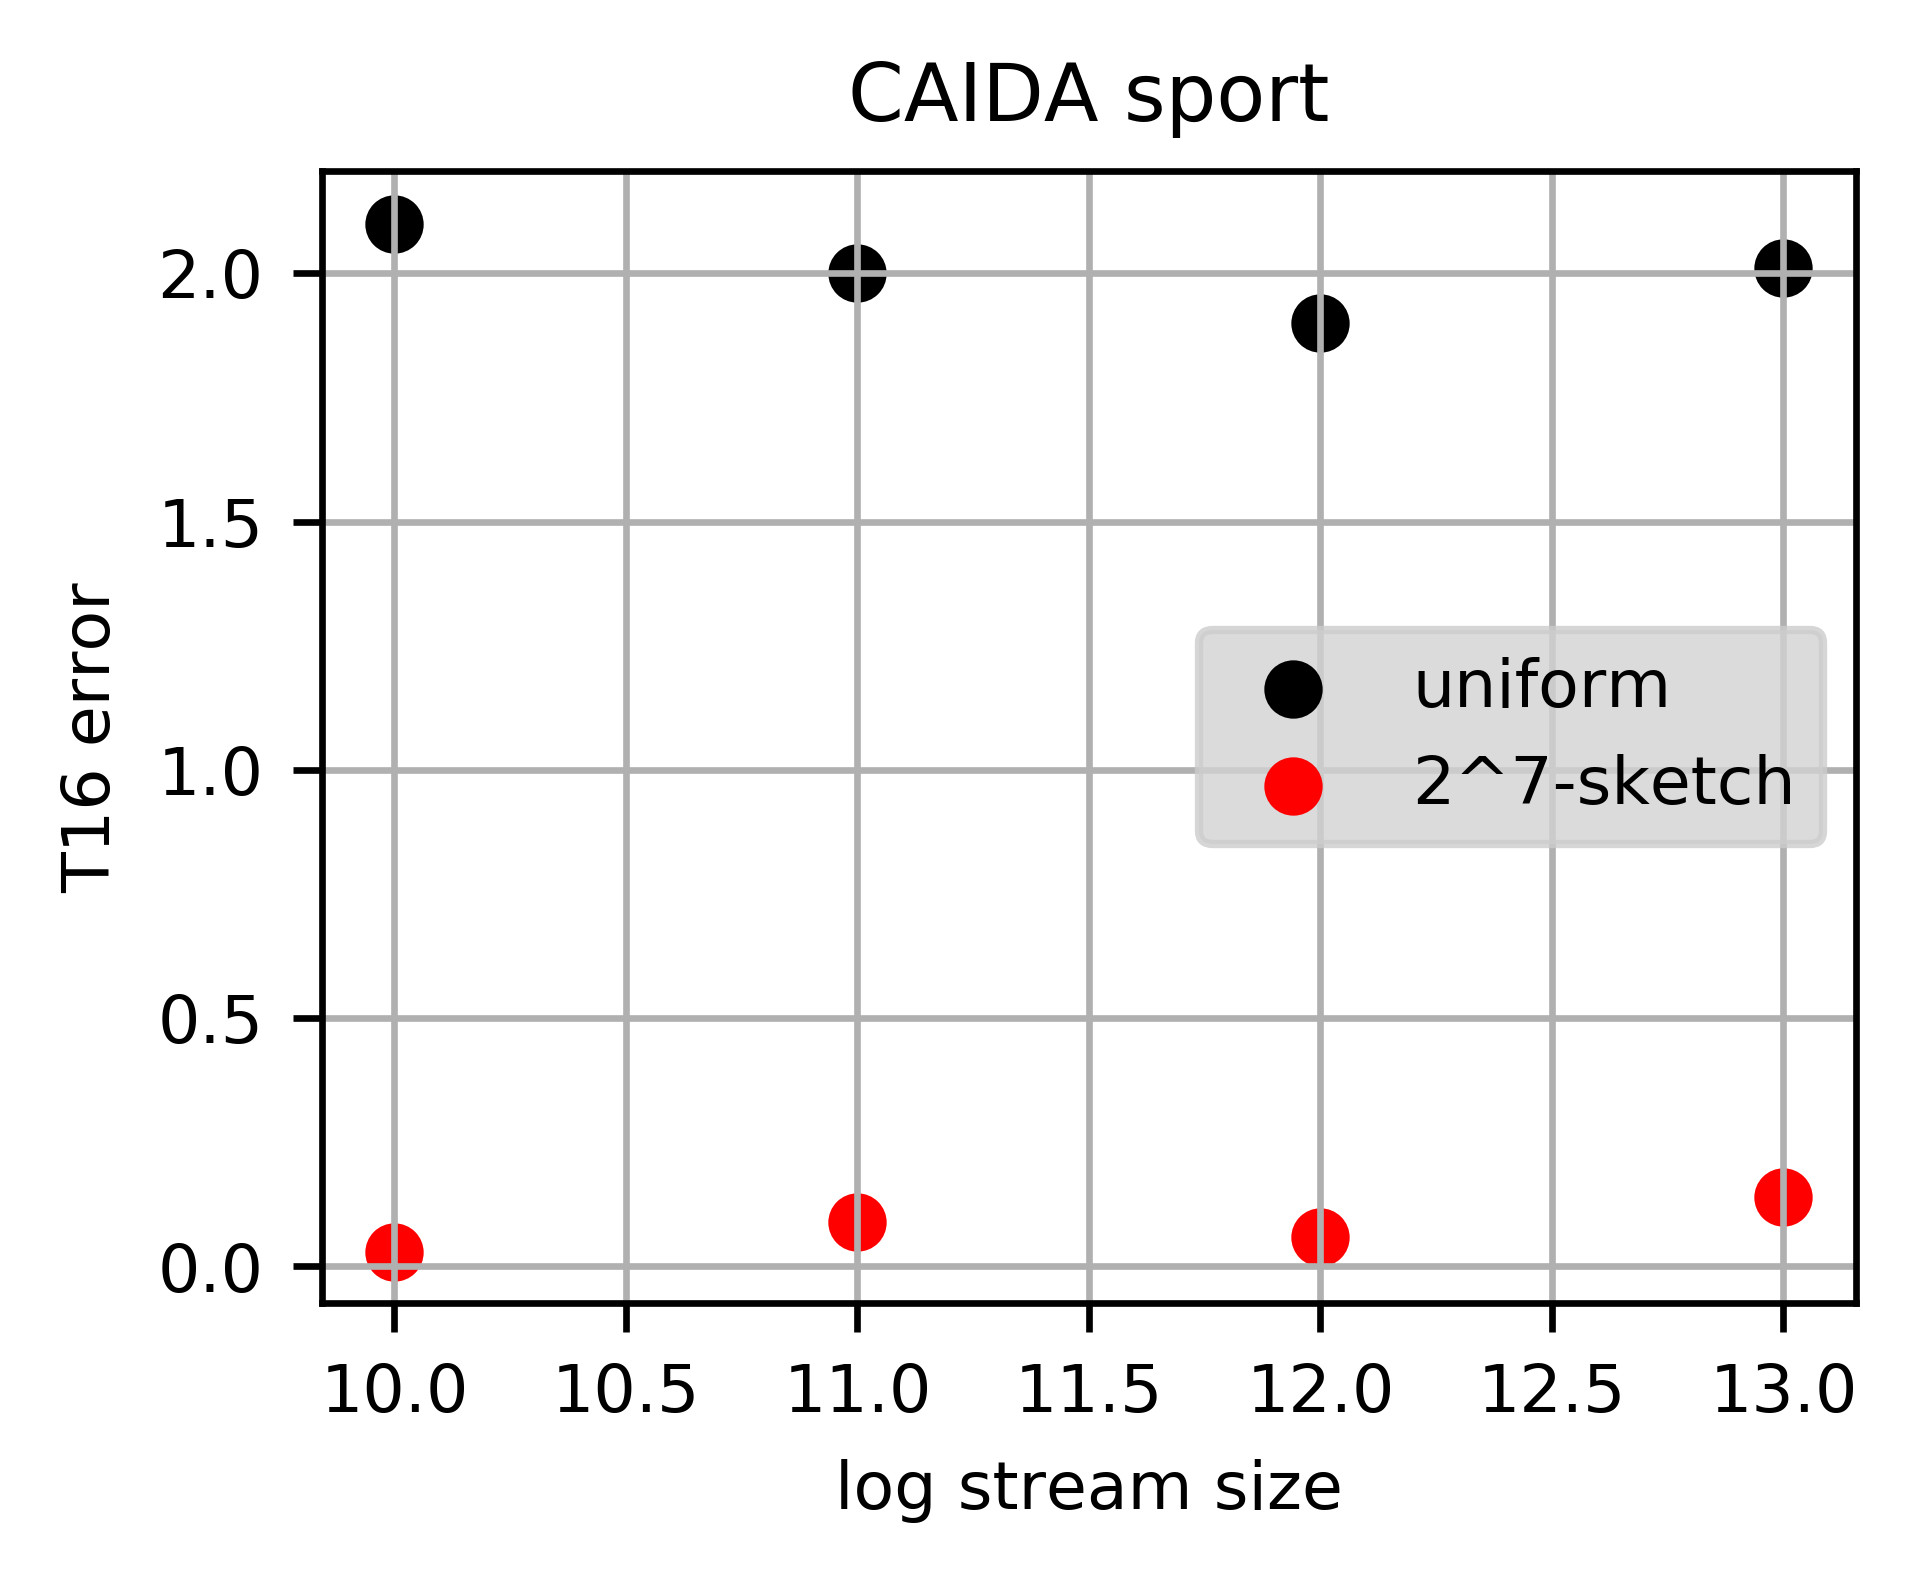

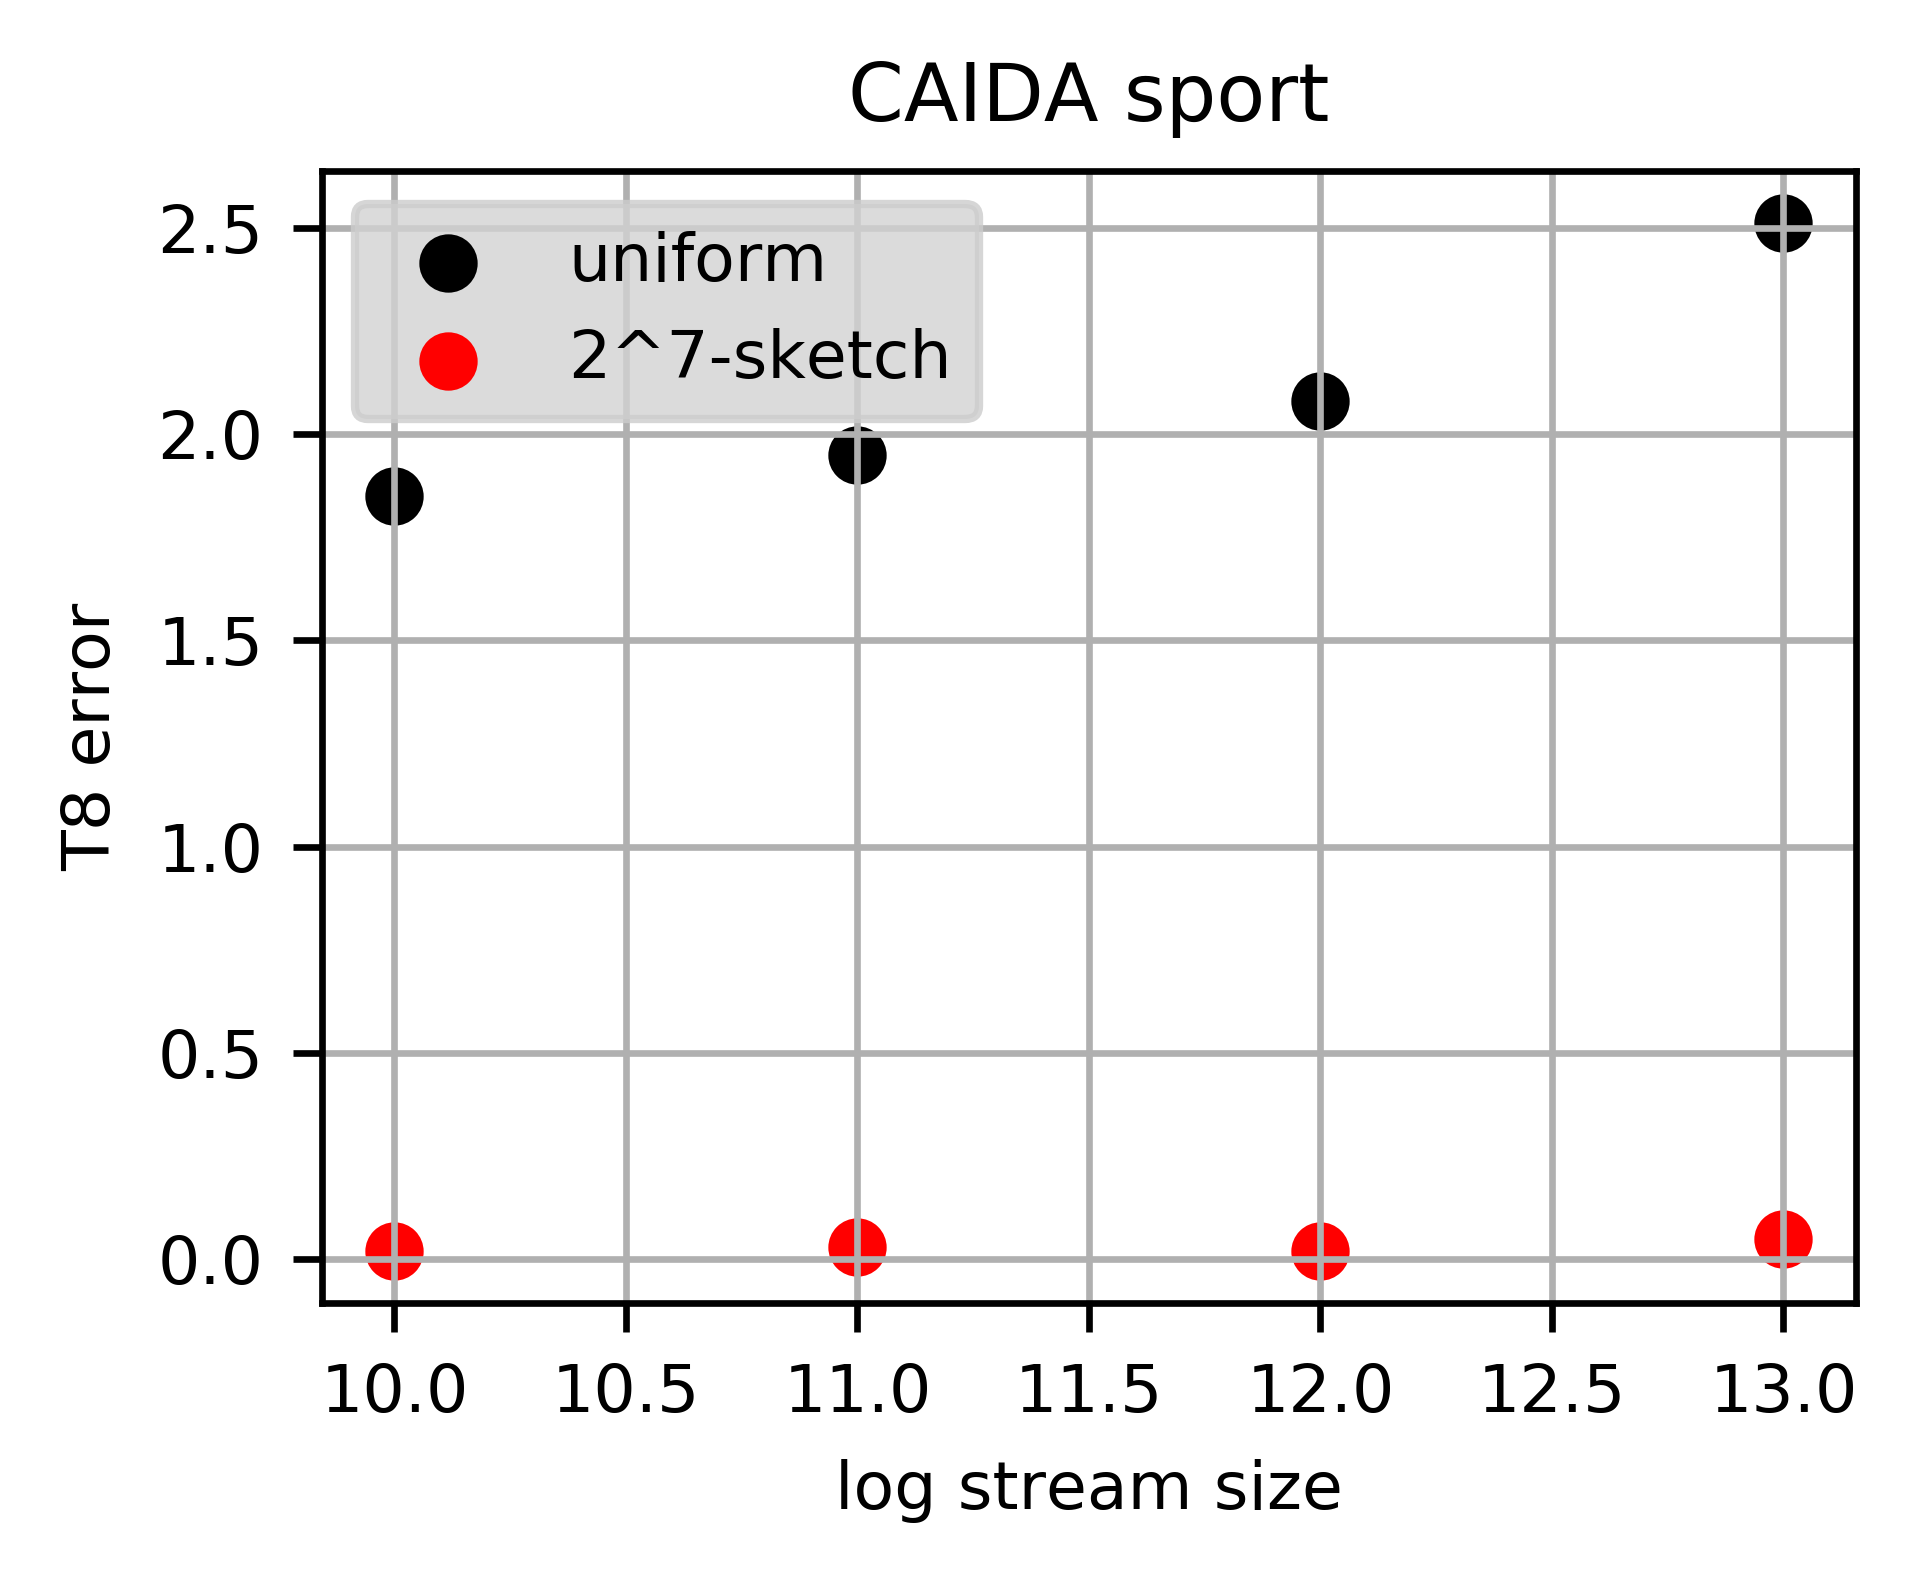

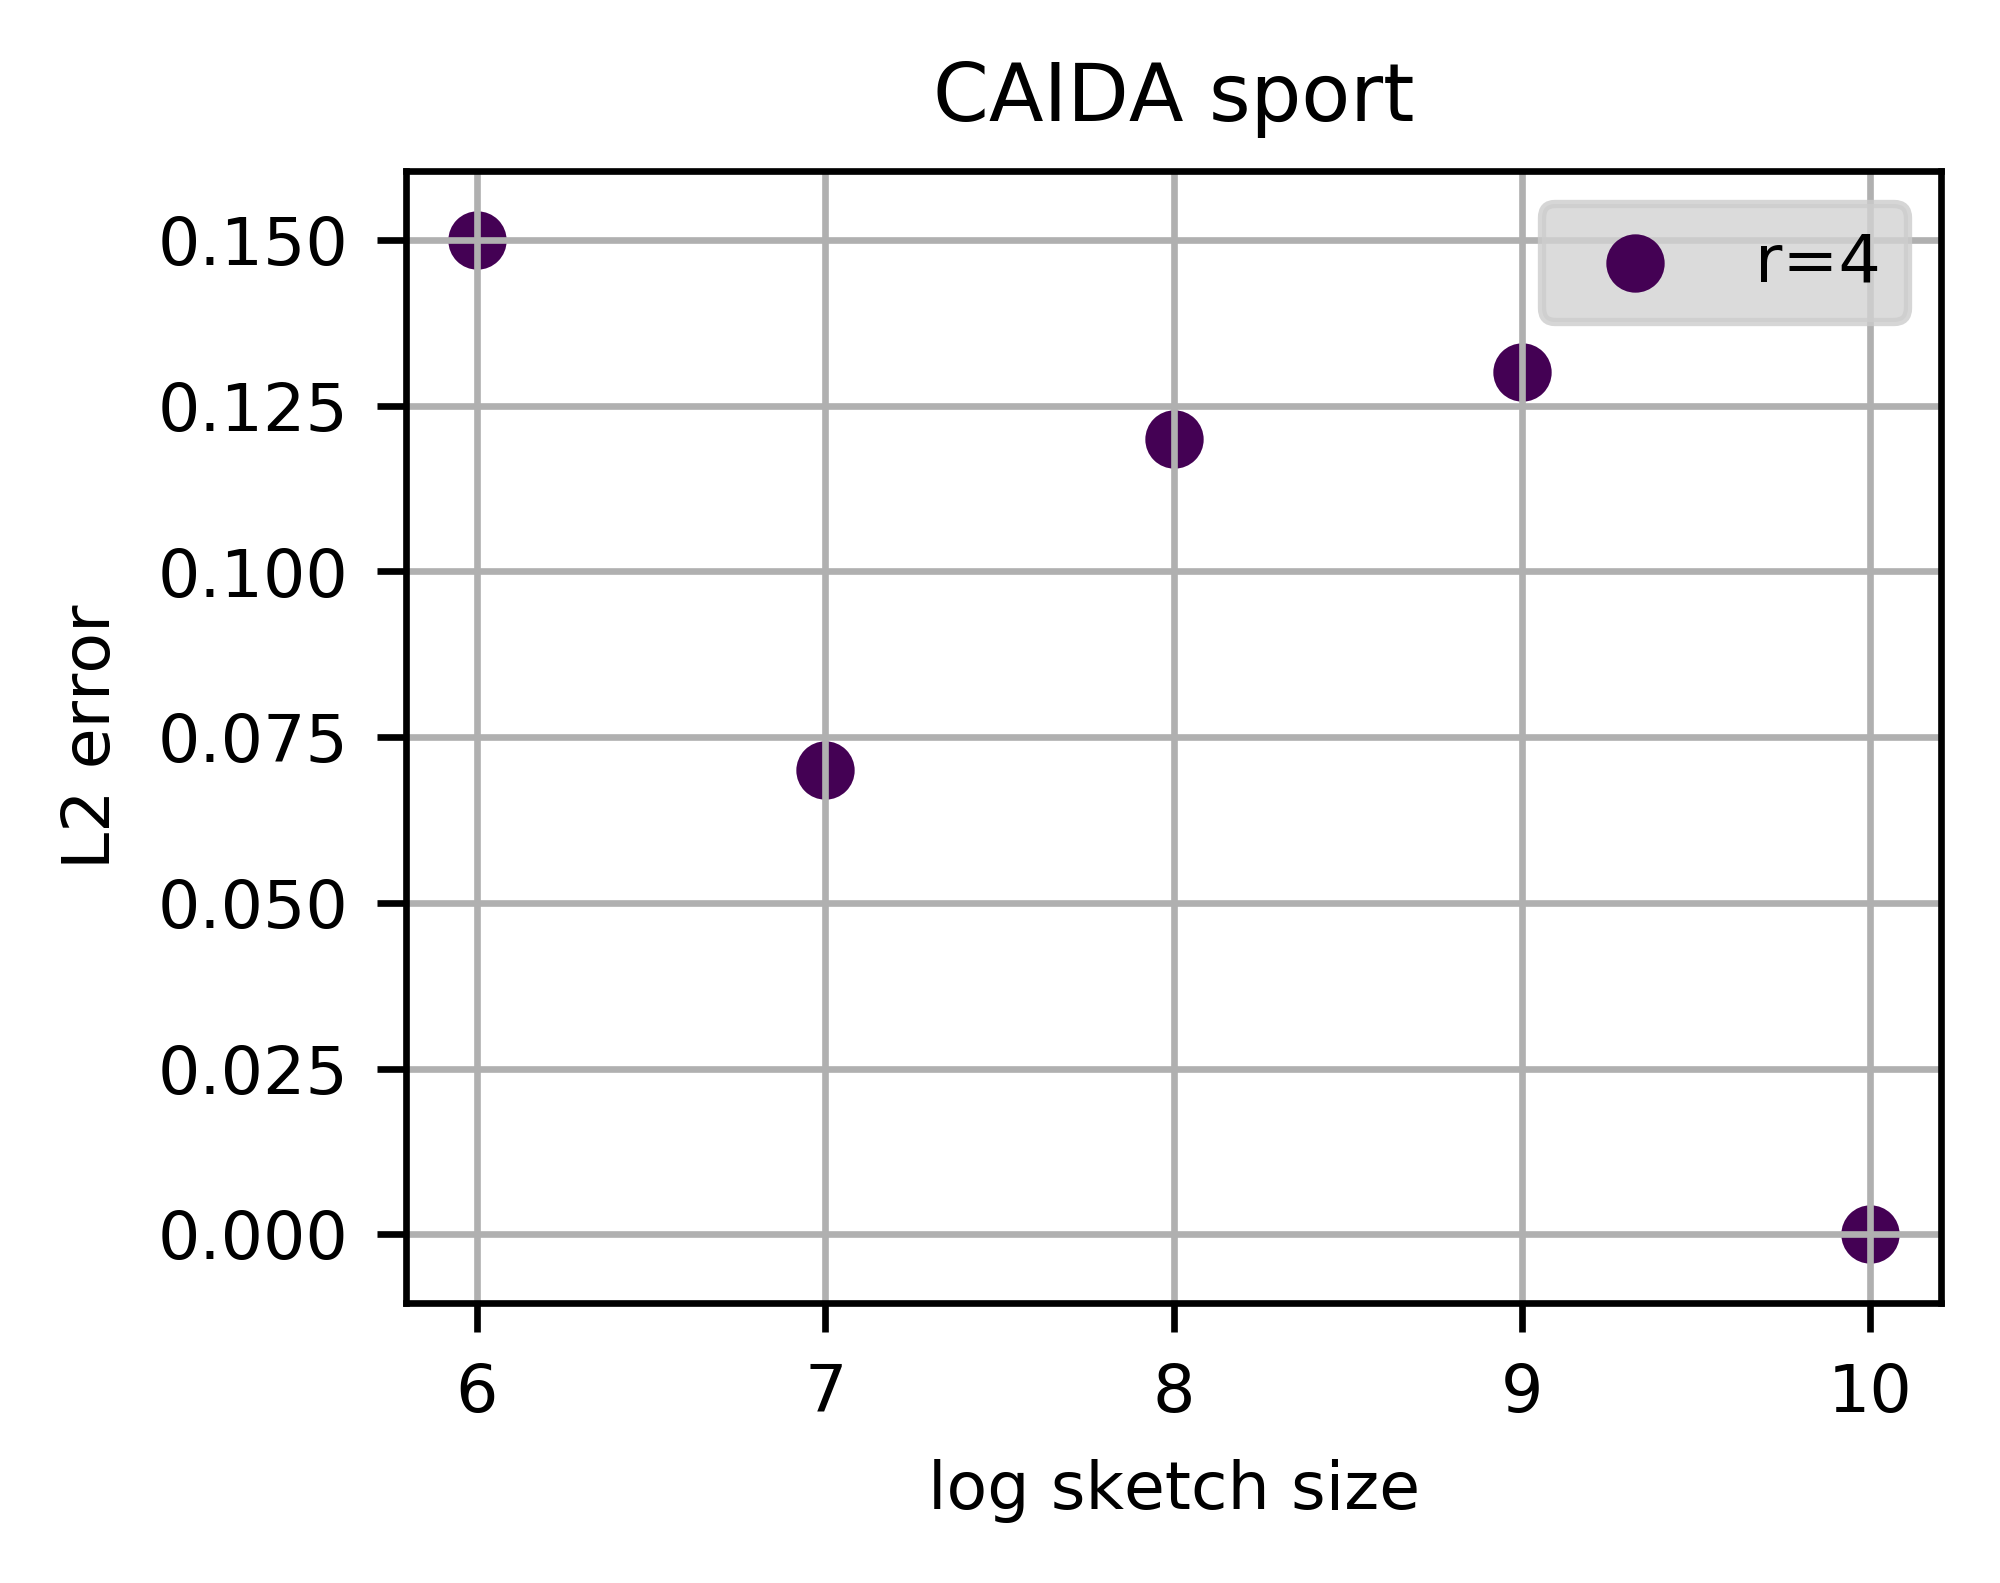

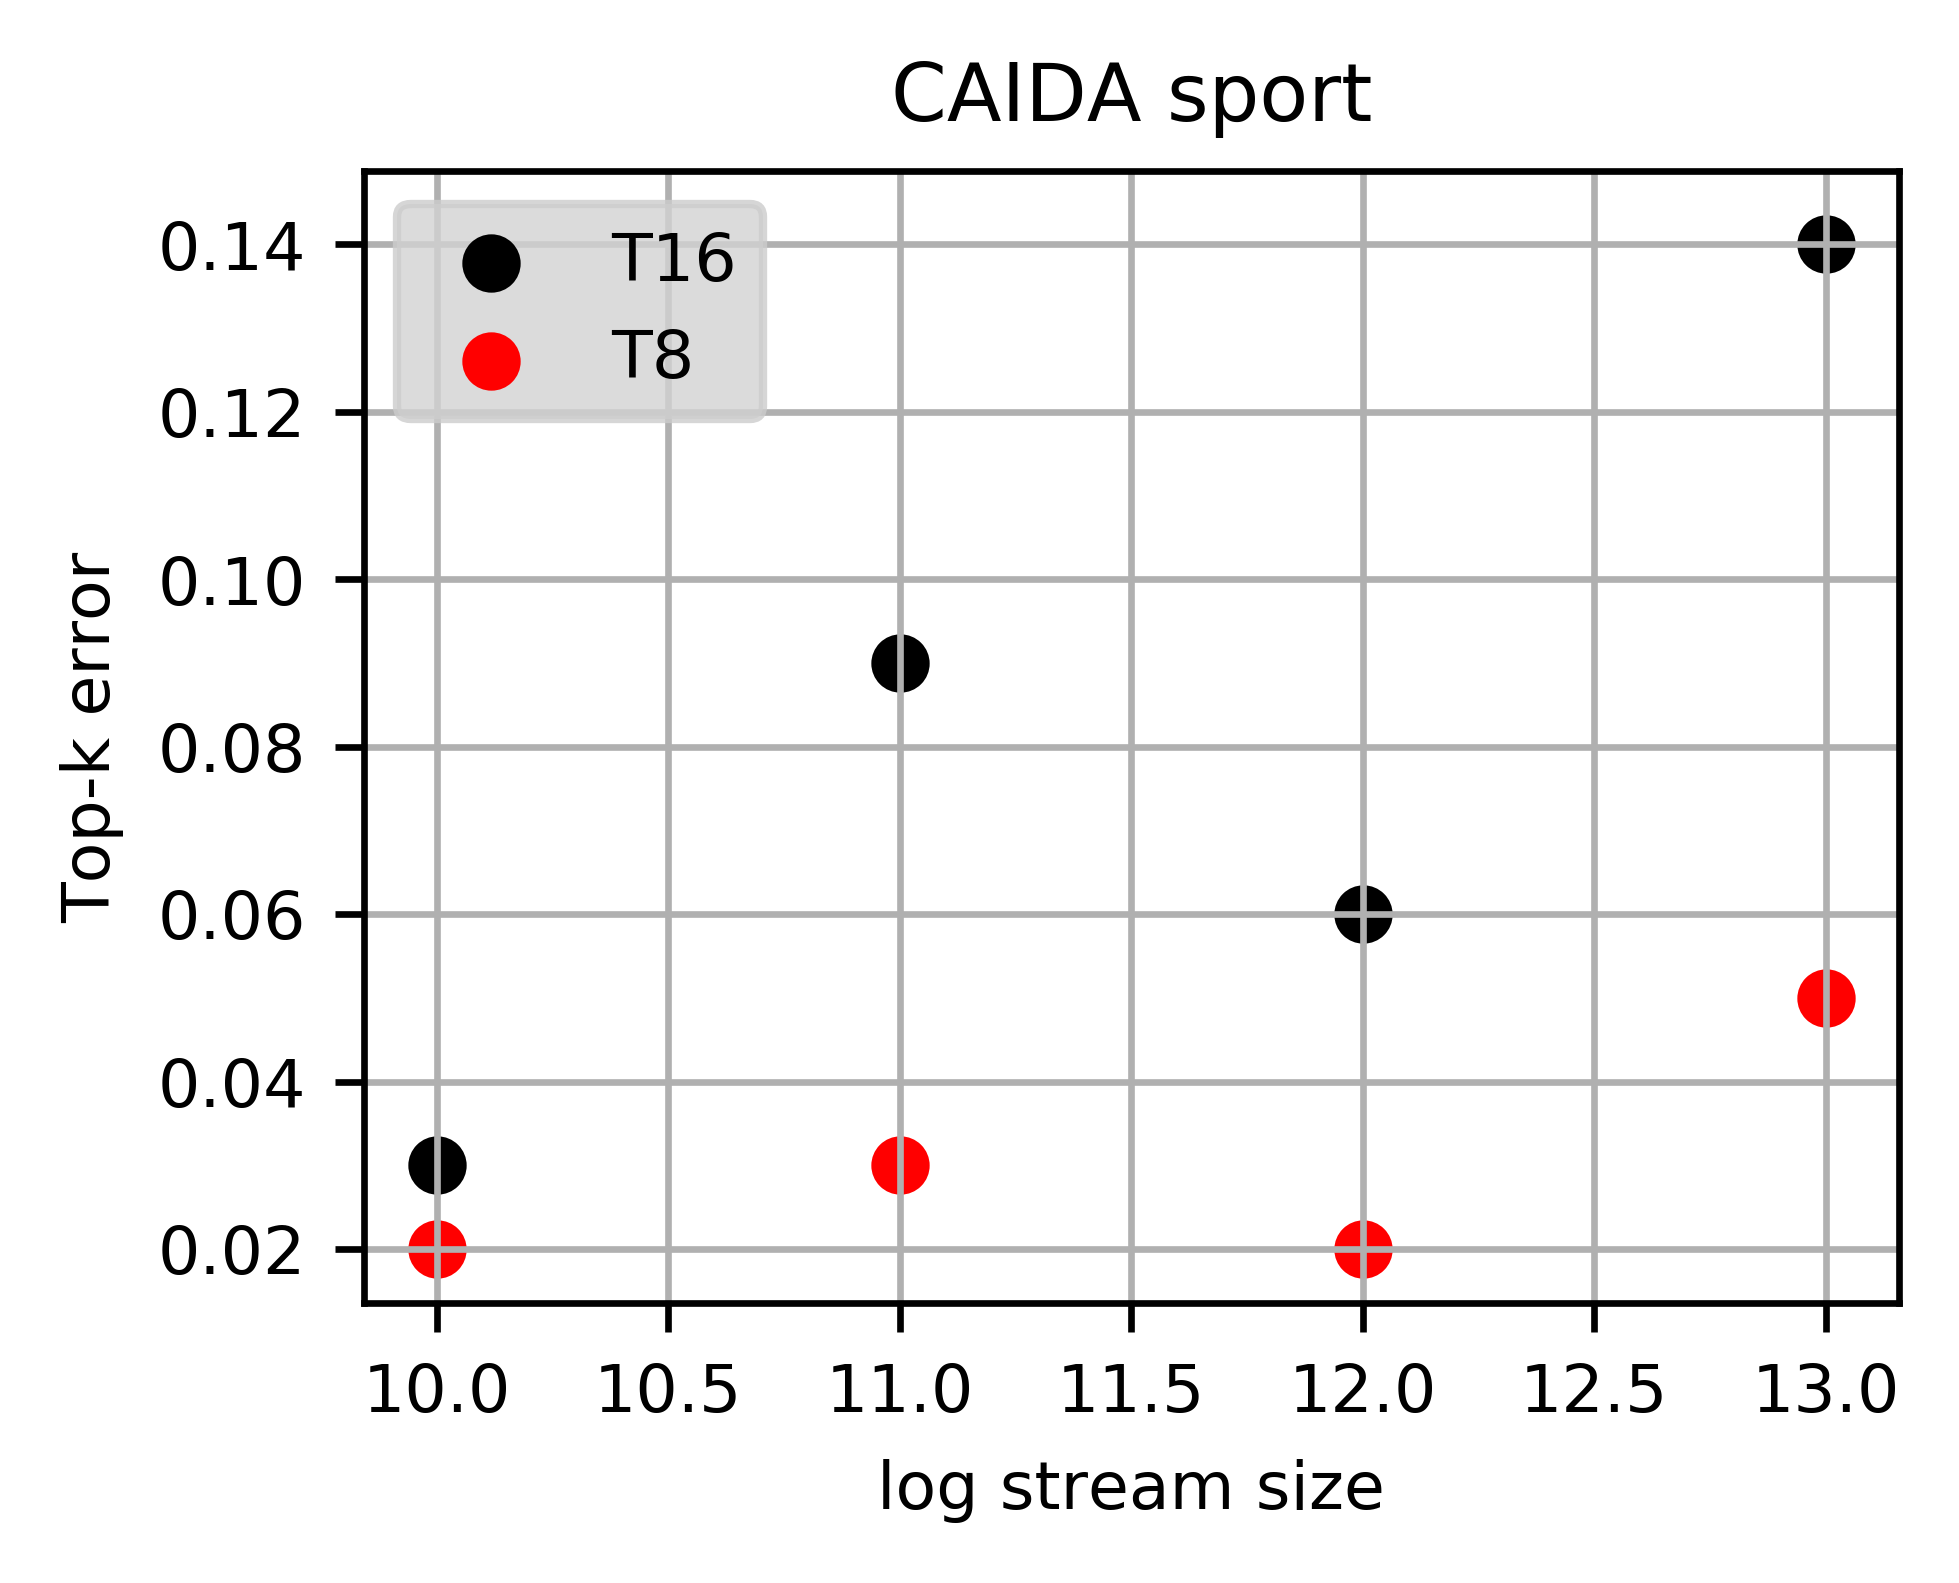

In [372]:
folder = 'out_sport2'
get_folder_plots(folder,save=True)

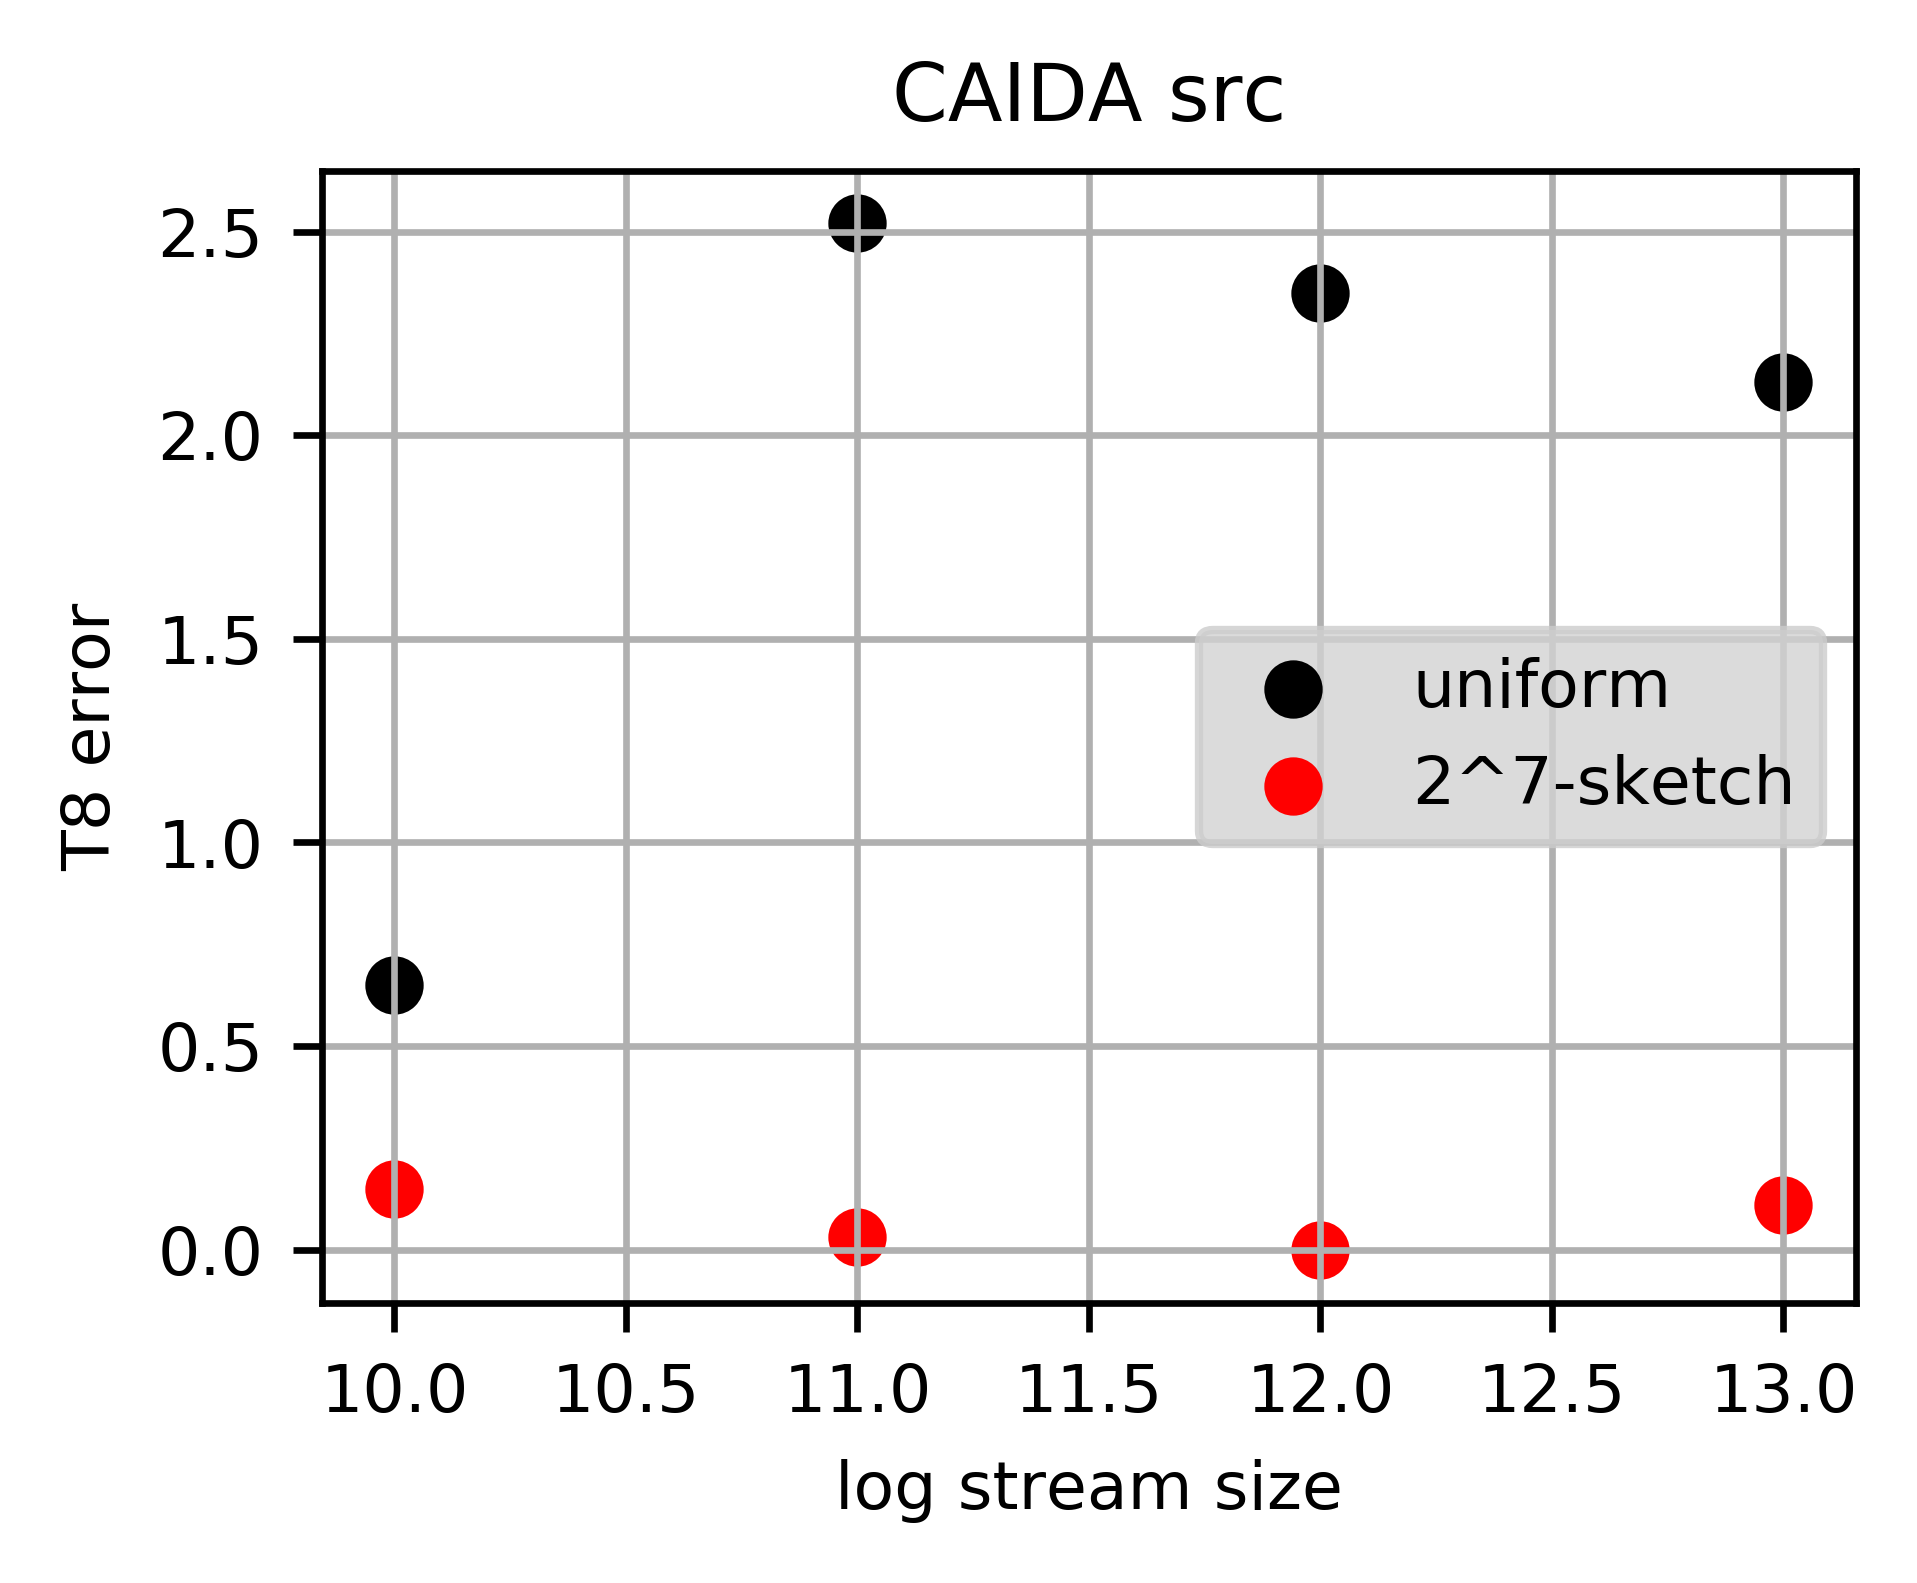

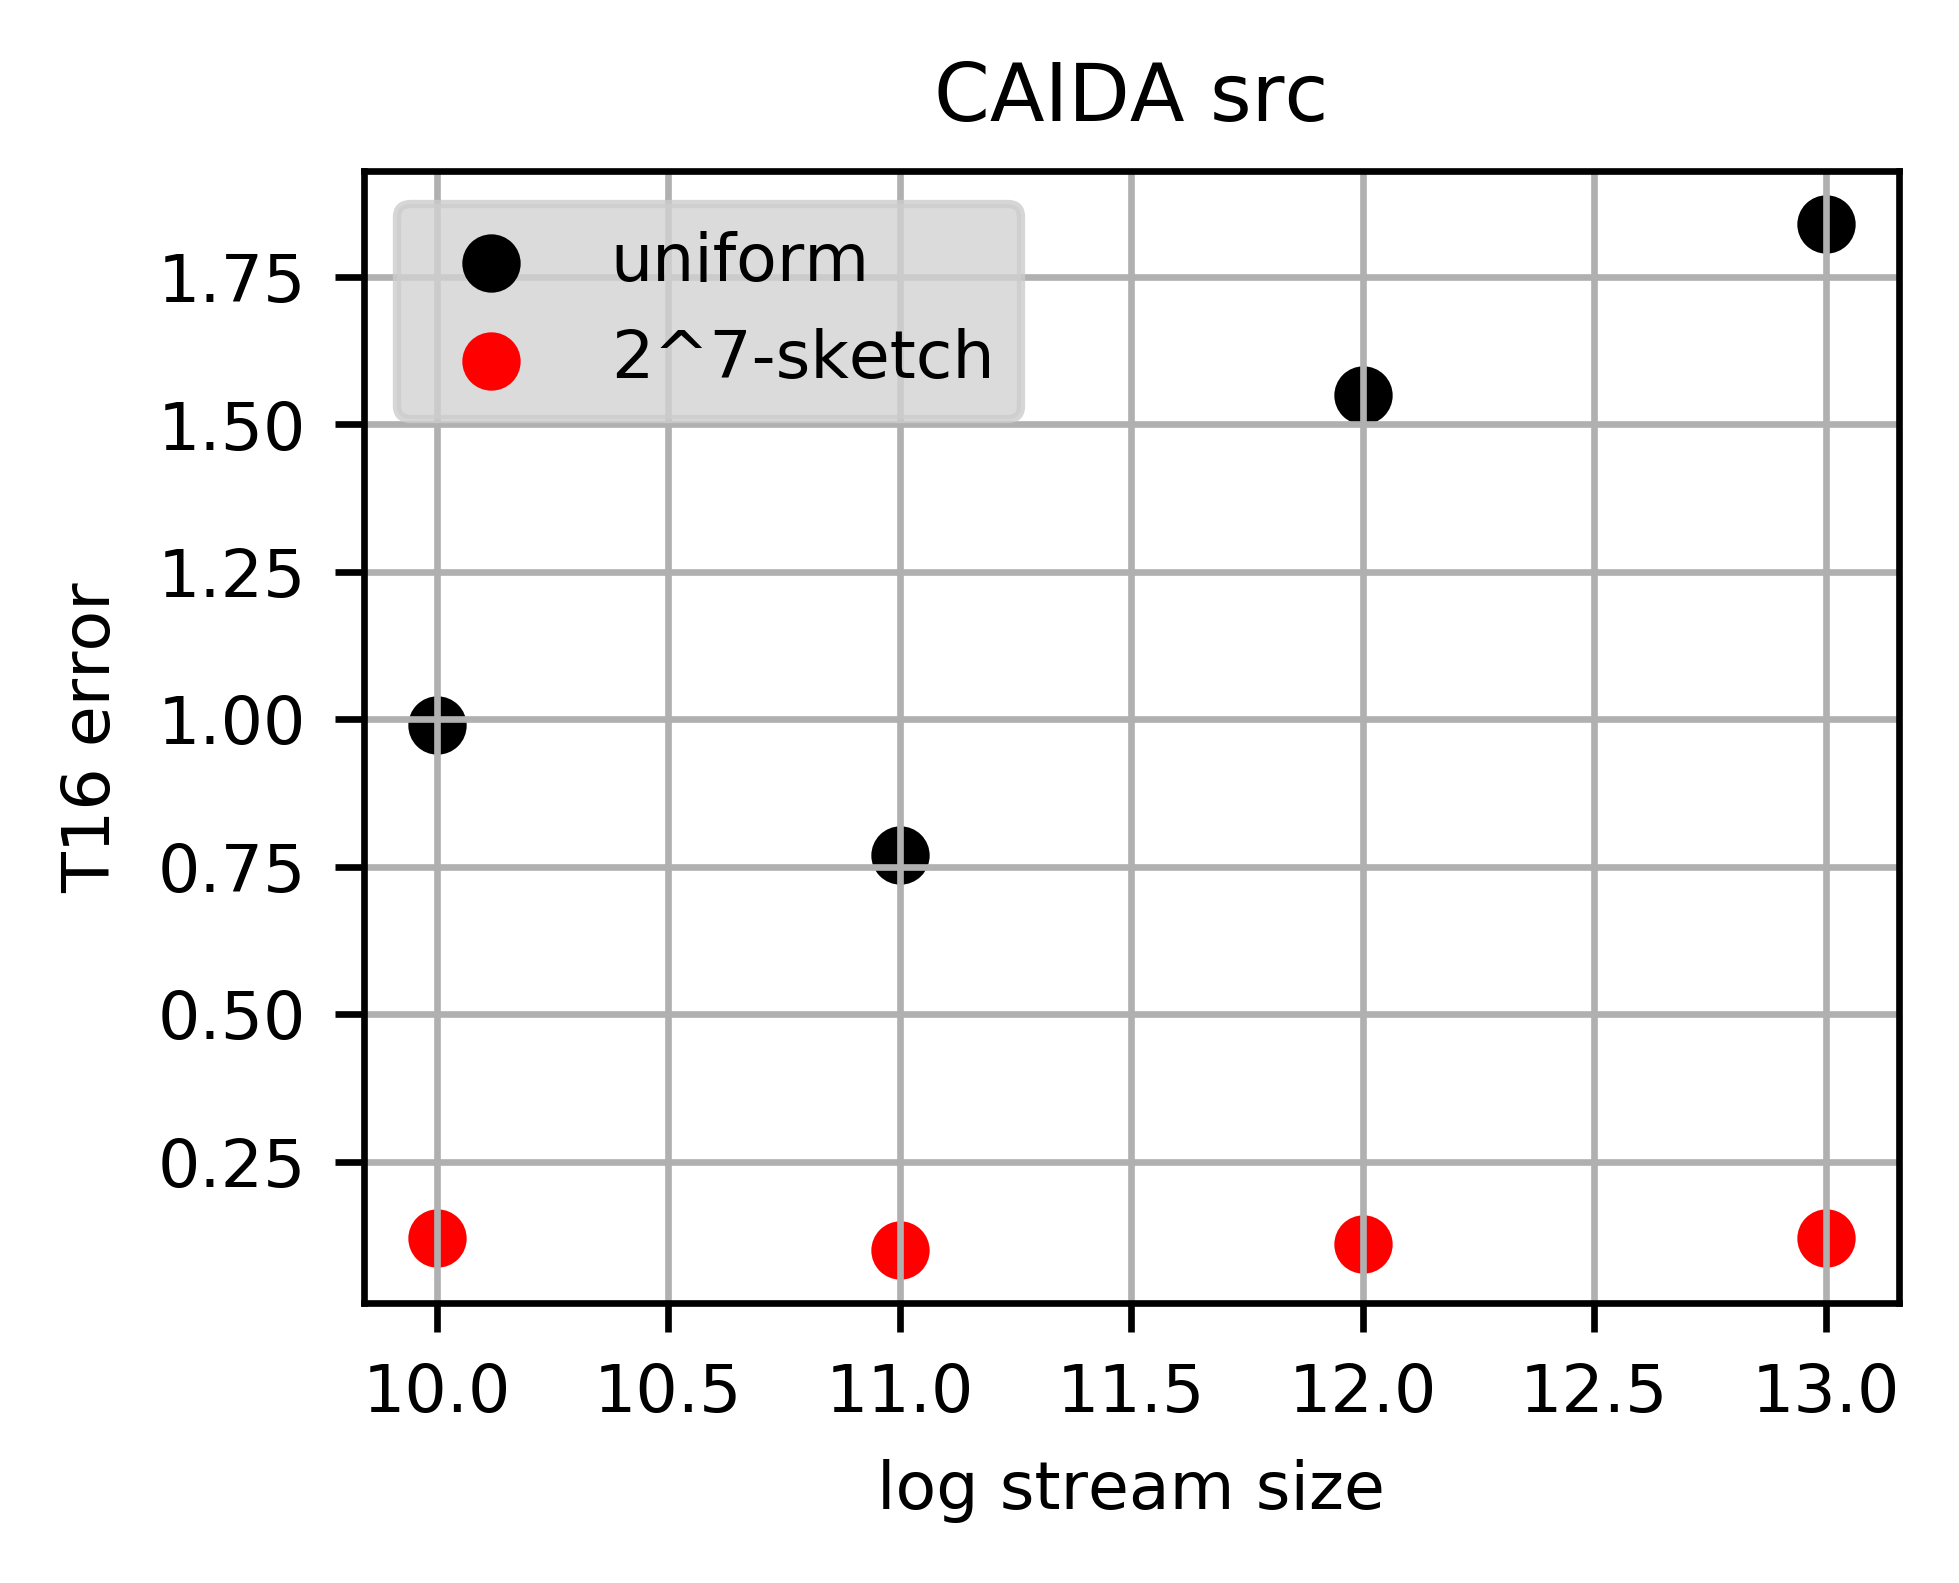

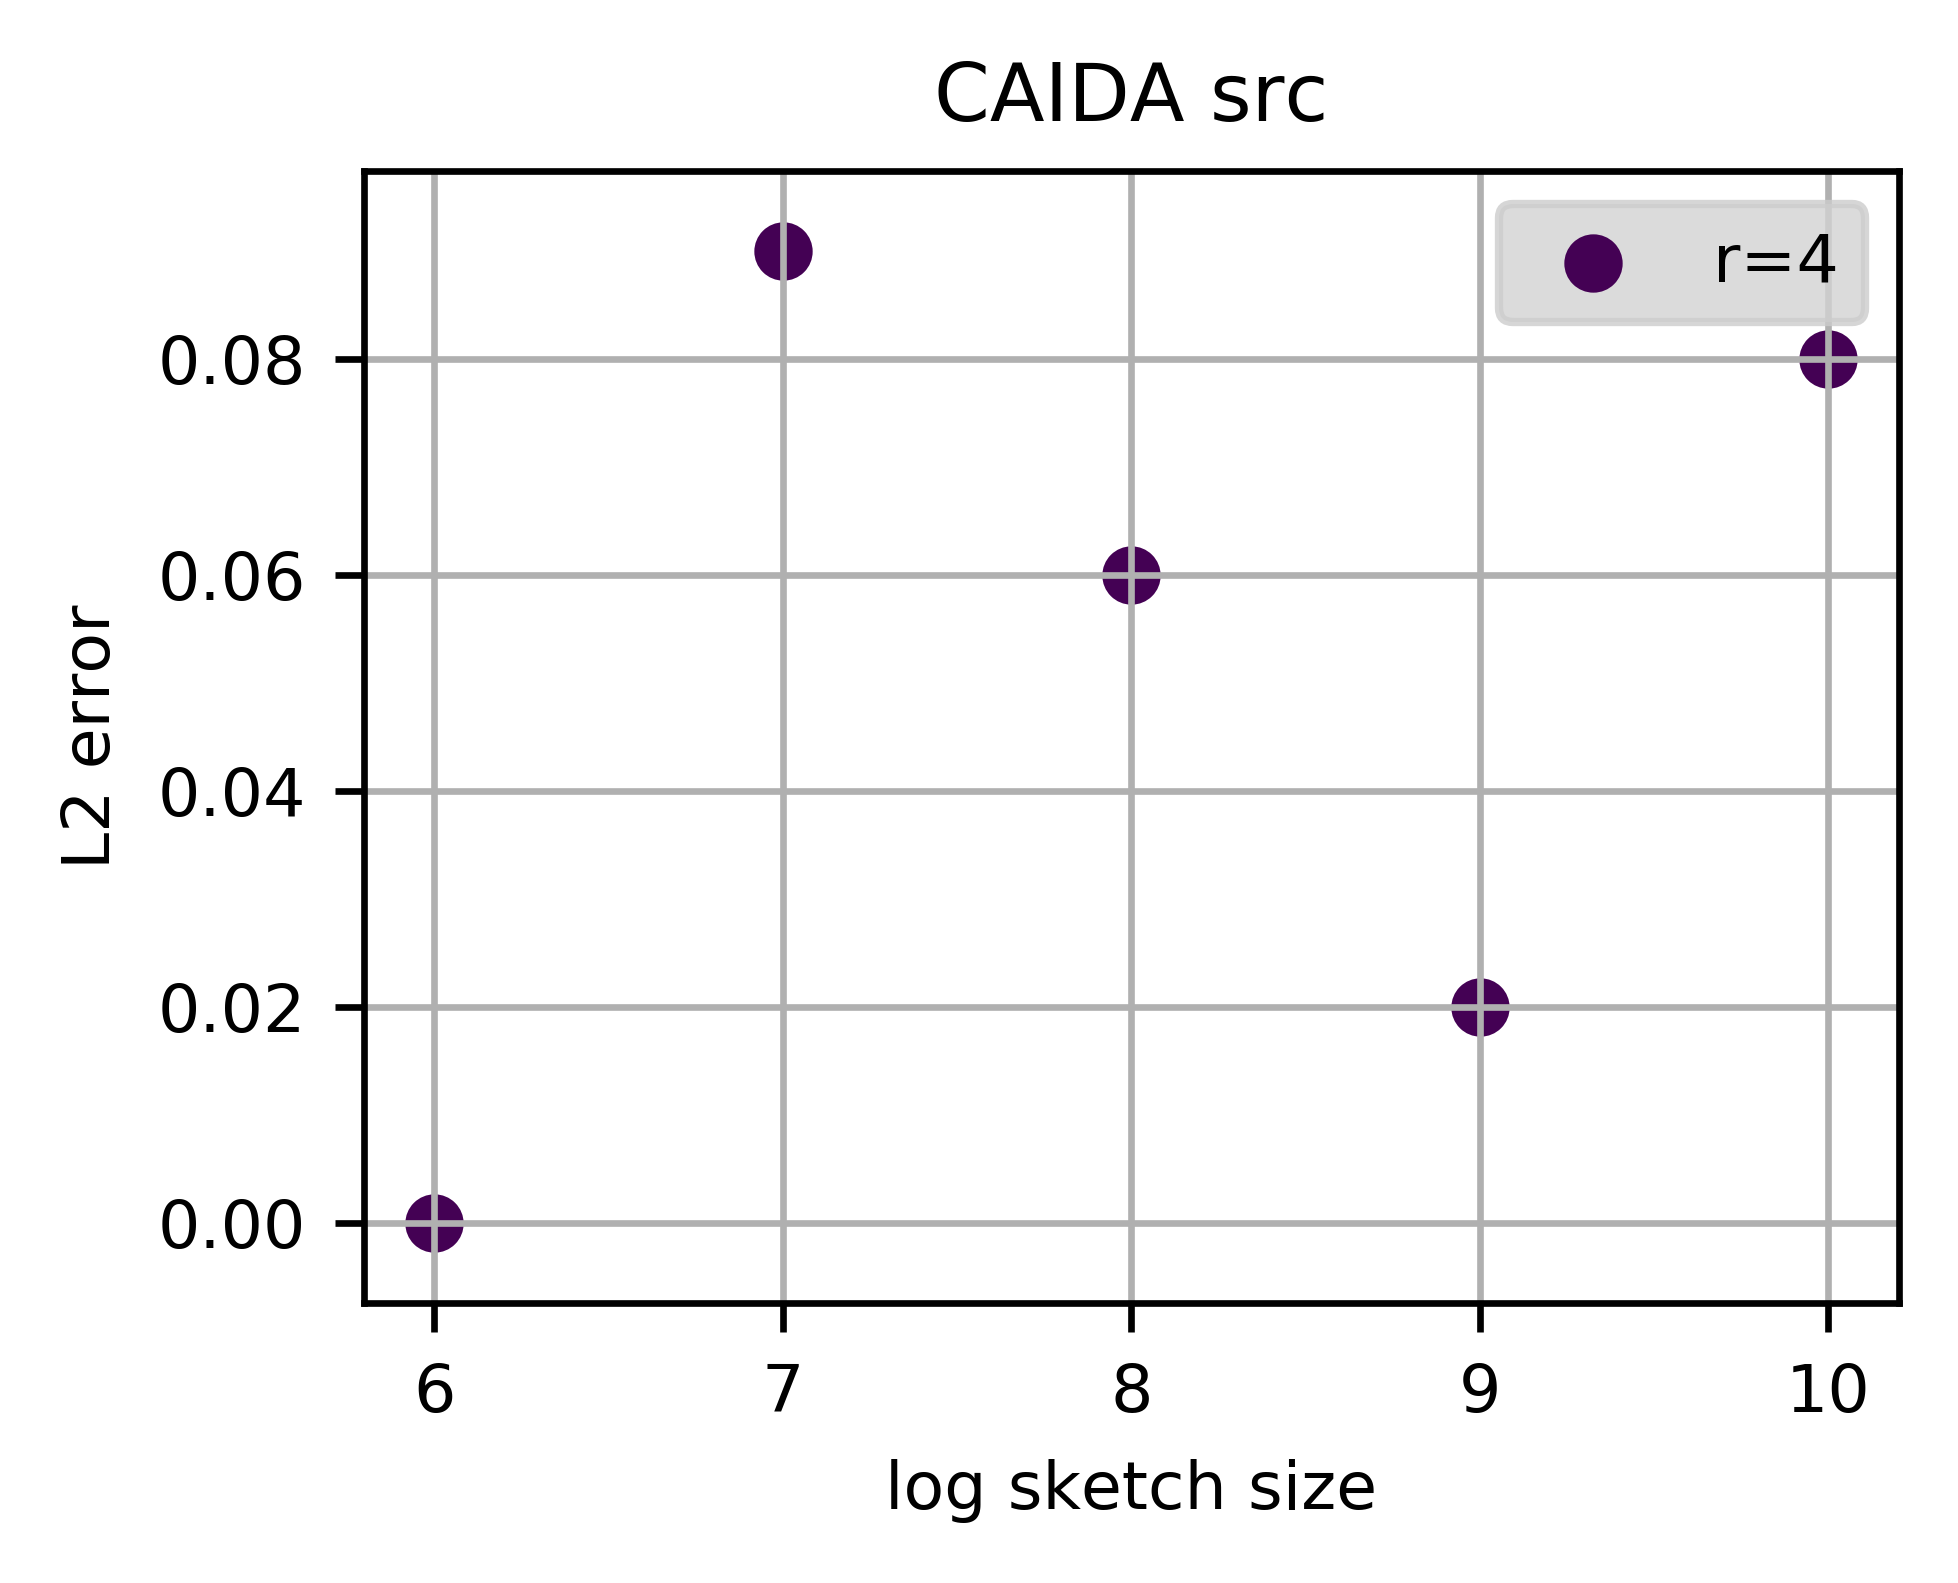

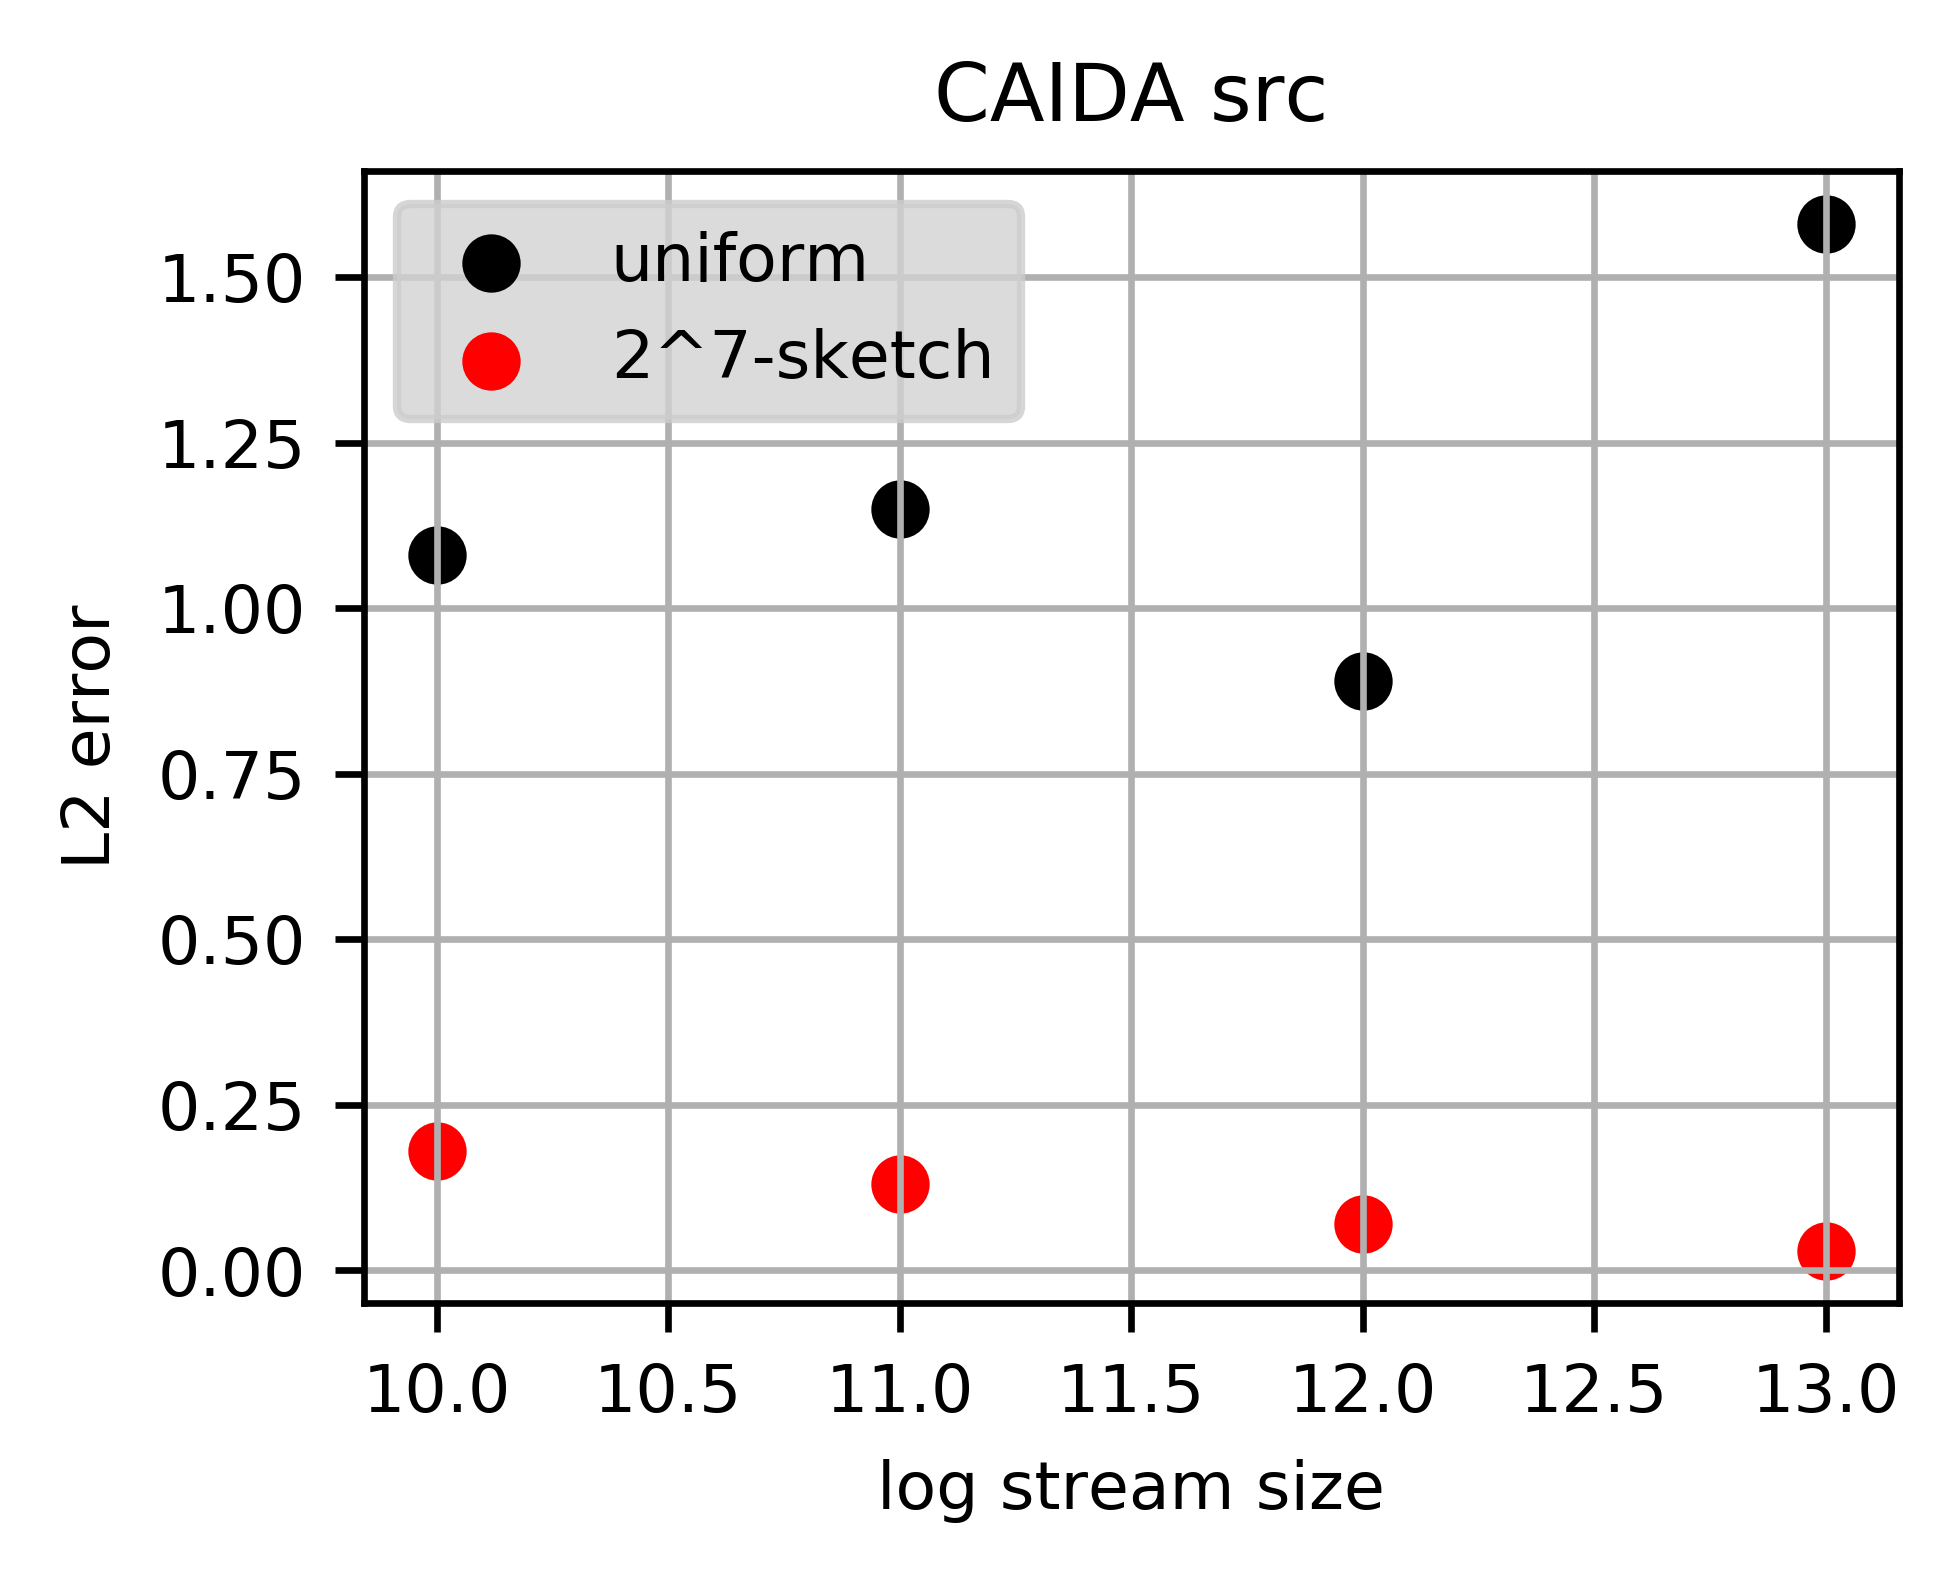

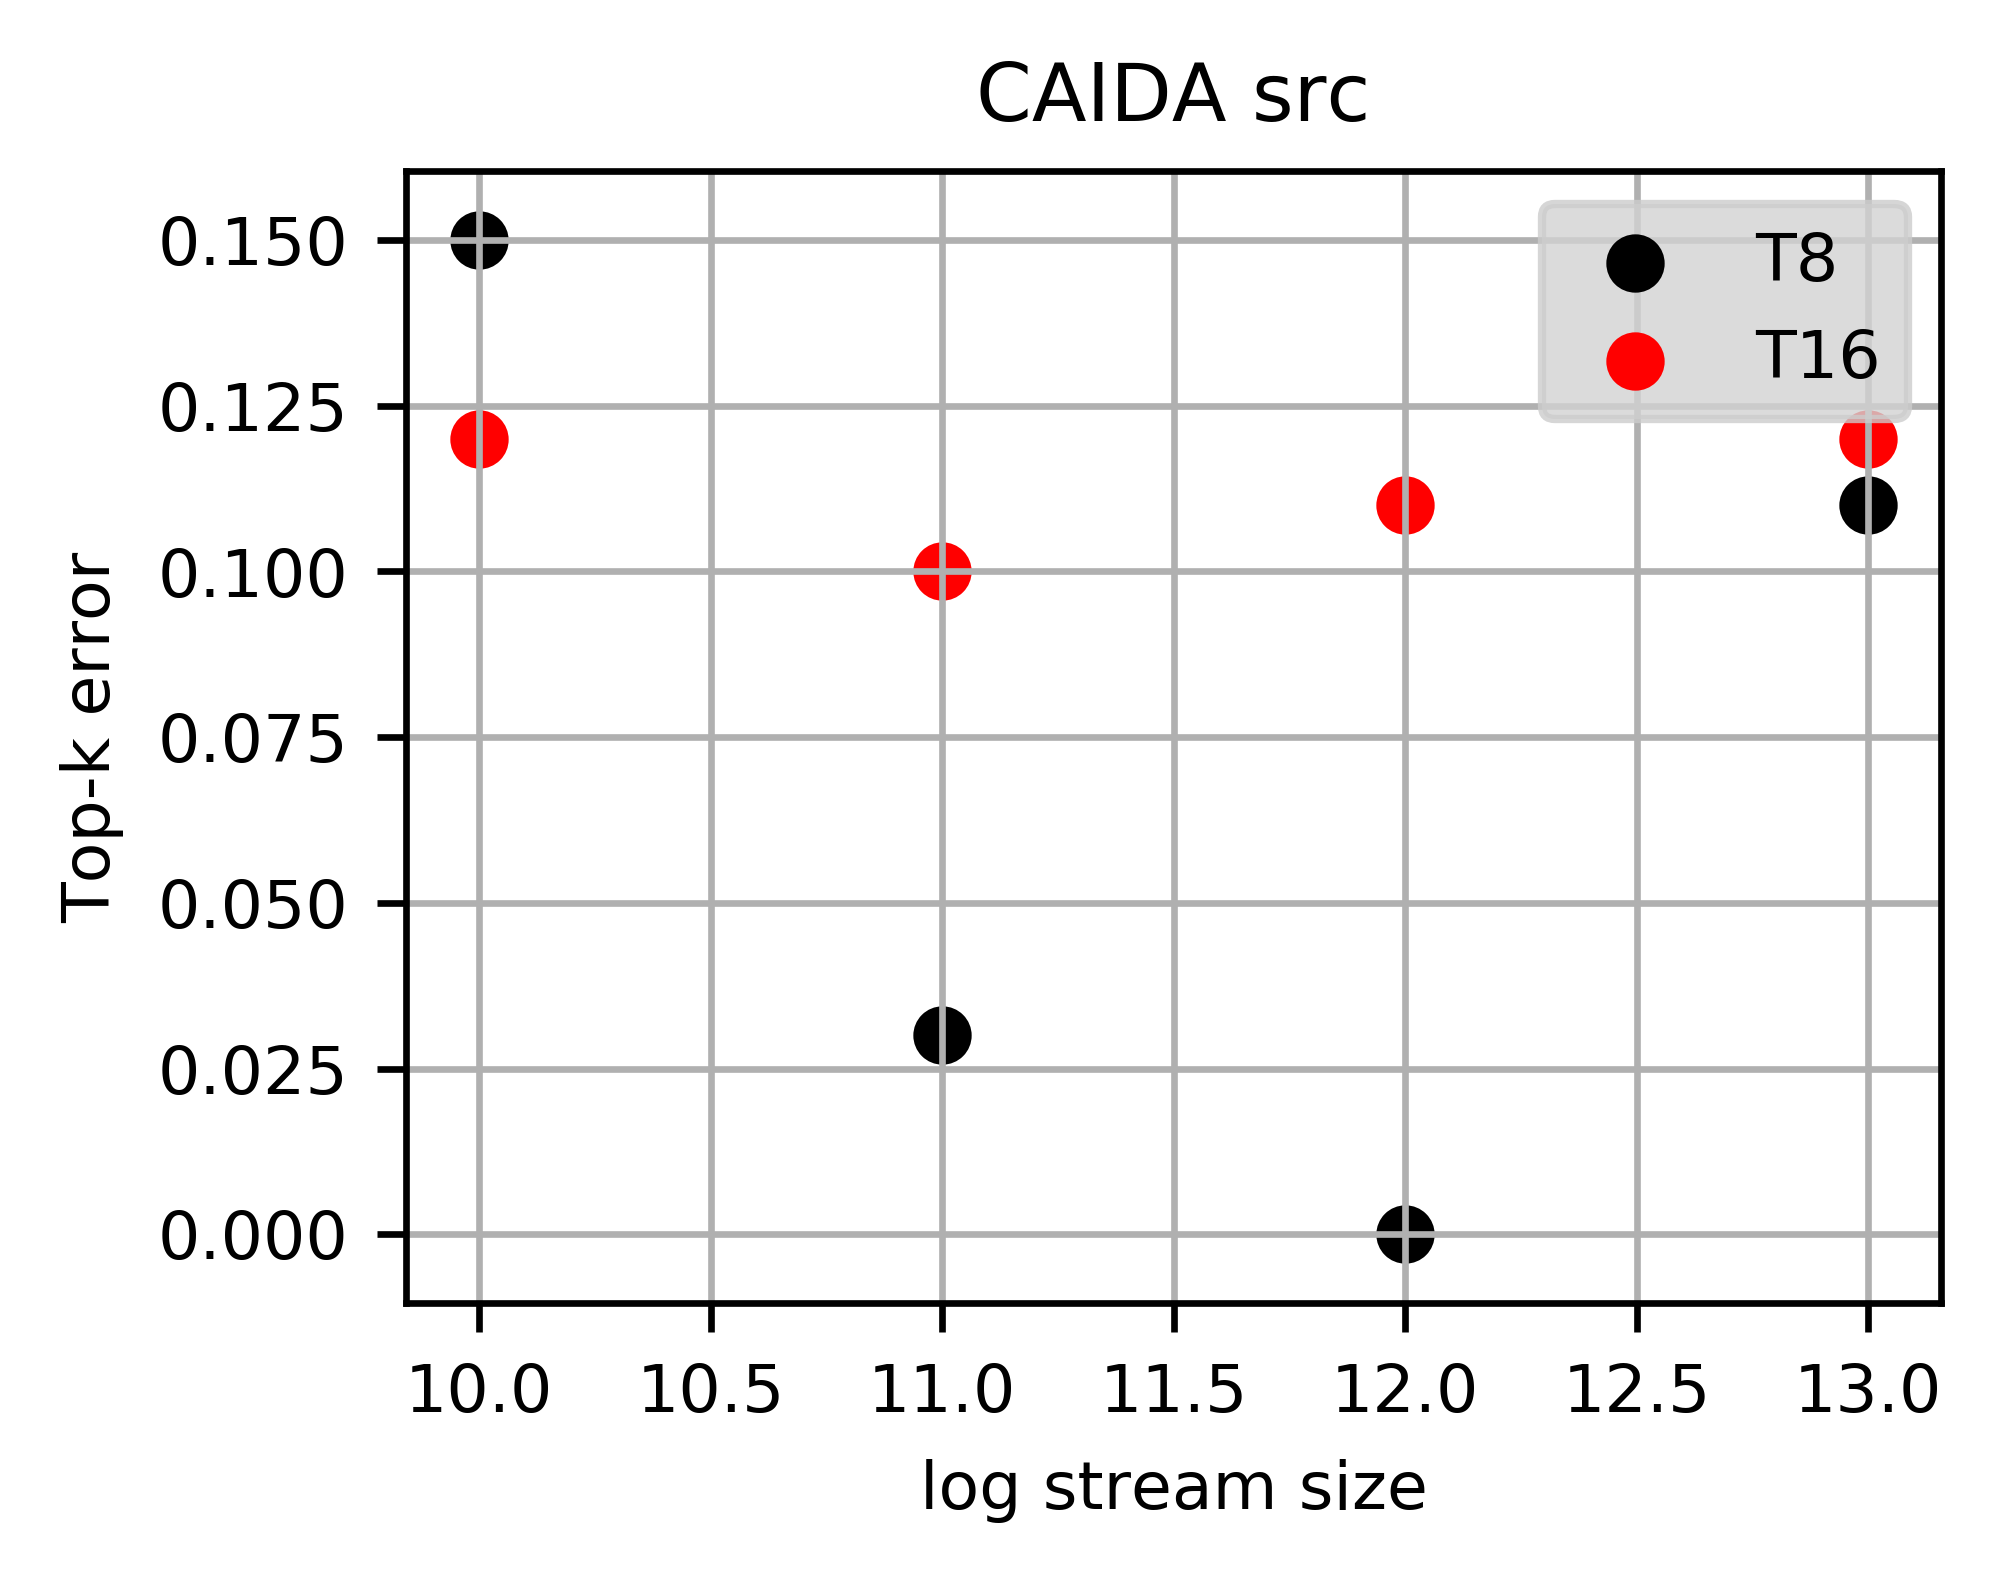

In [374]:
get_folder_plots('out_src',save=True)